In [1]:
import numpy as np
import pandas as pd


n_samples = 5000
np.random.seed(42)


numero_conteneur = ["CT" + str(i).zfill(4) for i in range(1, n_samples + 1)]
numero_plombage = ["PL" + str(np.random.randint(100000, 999999)) for _ in range(n_samples)]

bruit_fond_debit = np.random.uniform(30, 90, n_samples)
bruit_fond_cps = np.random.uniform(0.36, 2, n_samples)


interieur_conteneur_debit = bruit_fond_debit + np.random.normal(loc=0, scale=2, size=n_samples)
interieur_conteneur_cps = bruit_fond_cps + np.random.normal(loc=0, scale=0.1, size=n_samples)

exterieur_conteneur_debit = bruit_fond_debit + np.random.normal(loc=0, scale=2, size=n_samples)
exterieur_conteneur_cps = bruit_fond_cps + np.random.normal(loc=0, scale=0.1, size=n_samples)


dose_gamma_chargement_debit = np.random.uniform(30, 90, n_samples)
dose_gamma_chargement_cps = np.random.uniform(0.36, 2, n_samples)

apres_plombage_debit = bruit_fond_debit + np.random.normal(loc=0, scale=2, size=n_samples)
apres_plombage_cps = bruit_fond_cps + np.random.normal(loc=0, scale=0.1, size=n_samples)

threshold = 10.0


non_contaminated = (
    (dose_gamma_chargement_debit <= bruit_fond_debit + threshold) &
    (dose_gamma_chargement_debit <= interieur_conteneur_debit + threshold) &
    (dose_gamma_chargement_debit <= exterieur_conteneur_debit + threshold) &
    (apres_plombage_debit <= bruit_fond_debit + threshold) &
    (apres_plombage_debit <= interieur_conteneur_debit + threshold) &
    (apres_plombage_debit <= exterieur_conteneur_debit + threshold)
)
contamination = (~non_contaminated).astype(int)

contaminated_indices = np.where(contamination == 1)[0]
non_contaminated_indices = np.where(contamination == 0)[0]


n_balanced = min(len(contaminated_indices), len(non_contaminated_indices))
selected_contaminated = np.random.choice(contaminated_indices, n_balanced, replace=False)
selected_non_contaminated = np.random.choice(non_contaminated_indices, n_balanced, replace=False)

# Combiner les indices sélectionnés
balanced_indices = np.concatenate([selected_contaminated, selected_non_contaminated])
np.random.shuffle(balanced_indices)

balanced_dataset = pd.DataFrame({
    "numero_conteneur": np.array(numero_conteneur)[balanced_indices],
    "numero_plombage": np.array(numero_plombage)[balanced_indices],
    "bruit_fond_debit_nsvh": np.round(bruit_fond_debit[balanced_indices], 2),
    "bruit_fond_cps": np.round(bruit_fond_cps[balanced_indices], 2),
    "interieur_conteneur_debit_nsvh": np.round(interieur_conteneur_debit[balanced_indices], 2),
    "interieur_conteneur_cps": np.round(interieur_conteneur_cps[balanced_indices], 2),
    "exterieur_conteneur_debit_nsvh": np.round(exterieur_conteneur_debit[balanced_indices], 2),
    "exterieur_conteneur_cps": np.round(exterieur_conteneur_cps[balanced_indices], 2),
    "apres_plombage_conteneur_debit_nsvh": np.round(apres_plombage_debit[balanced_indices], 2),
    "apres_plombage_conteneur_cps": np.round(apres_plombage_cps[balanced_indices], 2),
    "dose_gamma_chargement_debit_nsvh": np.round(dose_gamma_chargement_debit[balanced_indices], 2),
    "dose_gamma_chargement_cps": np.round(dose_gamma_chargement_cps[balanced_indices], 2),
    "contamination": contamination[balanced_indices]
})

# Afficher les 5 premières lignes du dataset équilibré
print(balanced_dataset.head())


balanced_dataset.to_csv("balanced_dataset_contamination.csv", index=False)


  numero_conteneur numero_plombage  bruit_fond_debit_nsvh  bruit_fond_cps  \
0           CT2526        PL716024                  46.70            1.56   
1           CT1264        PL879554                  35.26            1.38   
2           CT4169        PL108036                  64.27            1.46   
3           CT1709        PL431770                  85.57            1.87   
4           CT1703        PL713217                  46.04            1.10   

   interieur_conteneur_debit_nsvh  interieur_conteneur_cps  \
0                           48.14                     1.31   
1                           35.82                     1.35   
2                           64.24                     1.36   
3                           82.96                     1.82   
4                           47.37                     0.98   

   exterieur_conteneur_debit_nsvh  exterieur_conteneur_cps  \
0                           45.30                     1.55   
1                           33.88       

In [2]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 847.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
!pip install --upgrade --no-cache-dir torch torchvision torchaudio

In [4]:
# Installer et mettre à jour les packages nécessaires (à exécuter dans une cellule, si besoin)
!pip install --upgrade --no-cache-dir torch torchvision torchaudio
!pip install pytorch-tabnet

In [5]:
import torch
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --------------------------
# 1. Chargement du dataset
# --------------------------
df = pd.read_csv("balanced_dataset_contamination.csv")

# Sélection des features et de la target
features = df.drop(columns=["numero_conteneur", "numero_plombage", "contamination"])
target = df["contamination"]

# Encodage de la target (au cas où elle n'est pas en format numérique)
target = LabelEncoder().fit_transform(target)

# --------------------------
# 2. Séparation Train/Test
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# --------------------------
# 3. Normalisation des features
# --------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# 4. Définition et entraînement du modèle TabNet
# --------------------------
clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    gamma=1.5,
    lambda_sparse=1e-3,
    optimizer_params=dict(lr=2e-2),
    verbose=1
)


clf.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))




import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df[features.columns])  # Fit the scaler on your training data features

# Nouvelles valeurs à tester (remplacer ces valeurs par celles de votre choix)
nouvelle_entrée = {
    'bruit_fond_debit_nsvh': 30.8,
    'bruit_fond_cps': 0.8,
    'interieur_conteneur_debit_nsvh': 28.2,
    'interieur_conteneur_cps': 0.8,
    'exterieur_conteneur_debit_nsvh': 39.4,
    'exterieur_conteneur_cps': 1.4,
    'apres_plombage_conteneur_debit_nsvh': 30.1,
    'apres_plombage_conteneur_cps': 0.6,
    'dose_gamma_chargement_debit_nsvh': 40.1,
    'dose_gamma_chargement_cps': 0.6

}

# Conversion en array et normalisation
nouvelle_entrée = np.array([[valeur for valeur in nouvelle_entrée.values()]])
nouvelle_entrée_scaled = scaler.transform(nouvelle_entrée)  # Now you can transform

# Prédiction avec le modèle
prediction = clf.predict(nouvelle_entrée_scaled)
probabilités = clf.predict_proba(nouvelle_entrée_scaled)

# Affichage des résultats
if prediction[0] == 1:
    print("Résultat : Contaminé")
else:
    print("Résultat : Non contaminé")

print(f"Probabilités : Non contaminé = {probabilités[0][0]:.2f}, Contaminé = {probabilités[0][1]:.2f}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.7581  | train_accuracy: 0.75085 | valid_accuracy: 0.73243 |  0:00:00s
epoch 1  | loss: 0.40035 | train_accuracy: 0.84584 | valid_accuracy: 0.85946 |  0:00:01s
epoch 2  | loss: 0.30597 | train_accuracy: 0.8854  | valid_accuracy: 0.89324 |  0:00:01s
epoch 3  | loss: 0.25877 | train_accuracy: 0.90602 | valid_accuracy: 0.91081 |  0:00:01s
epoch 4  | loss: 0.22426 | train_accuracy: 0.93171 | valid_accuracy: 0.93243 |  0:00:02s
epoch 5  | loss: 0.18651 | train_accuracy: 0.94388 | valid_accuracy: 0.94054 |  0:00:02s
epoch 6  | loss: 0.14804 | train_accuracy: 0.94591 | valid_accuracy: 0.94189 |  0:00:02s
epoch 7  | loss: 0.13205 | train_accuracy: 0.95673 | valid_accuracy: 0.95811 |  0:00:02s
epoch 8  | loss: 0.12417 | train_accuracy: 0.96586 | valid_accuracy: 0.96351 |  0:00:03s
epoch 9  | loss: 0.10915 | train_accuracy: 0.97262 | valid_accuracy: 0.97297 |  0:00:03s
epoch 10 | loss: 0.08836 | train_accuracy: 0.97465 | valid_accuracy: 0.97973 |  0:00:04s
epoch 11 | loss: 0.09

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Résultat : Non contaminé
Probabilités : Non contaminé = 0.50, Contaminé = 0.50


In [6]:
# Sauvegarde du modèle
model_path = "tabnet_model.zip"
clf.save_model(model_path)
print(f"Modèle sauvegardé sous {model_path}")

Successfully saved model at tabnet_model.zip.zip
Modèle sauvegardé sous tabnet_model.zip


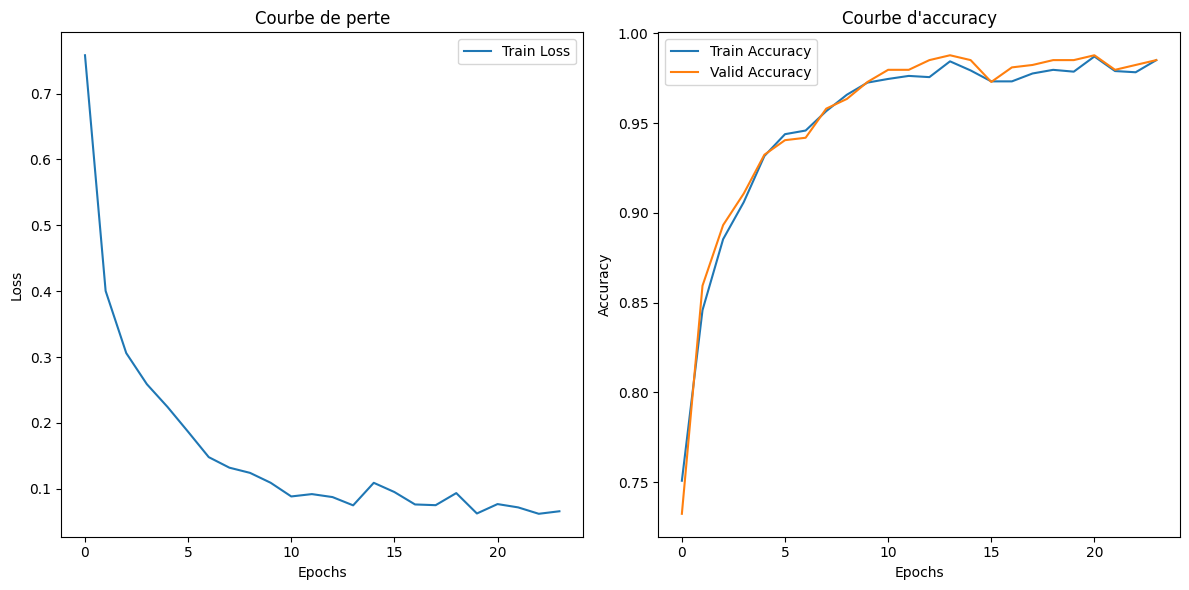

In [ ]:
import matplotlib.pyplot as plt

# Récupération des métriques depuis TabNet
train_loss = clf.history["loss"]
train_accuracy = clf.history["train_accuracy"]
valid_accuracy = clf.history["valid_accuracy"]

# Tracer les courbes
plt.figure(figsize=(12, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.title("Courbe de perte")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(valid_accuracy, label="Valid Accuracy")
plt.title("Courbe d'accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: 'TabNetClassifier' object has no attribute 'network'